In [3]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt

In [347]:
from scipy import ndimage
np.random.seed(0)
N = 256
a = 16
# img = np.random.randint(0,100,(a,a,a)).astype(np.float32)
img = np.random.randint(0,100,(a,a,a)).astype(np.float32)
img = ndimage.zoom(img,N/a).astype(np.float32)
ka = 21
kernel = np.ones((ka,ka,ka)).astype(np.float32)
kernel = kernel/np.sum(kernel)
kernel = kernel.astype(np.float32)

In [41]:
img.shape

(128, 128, 128)

<IPython.core.display.Javascript object>


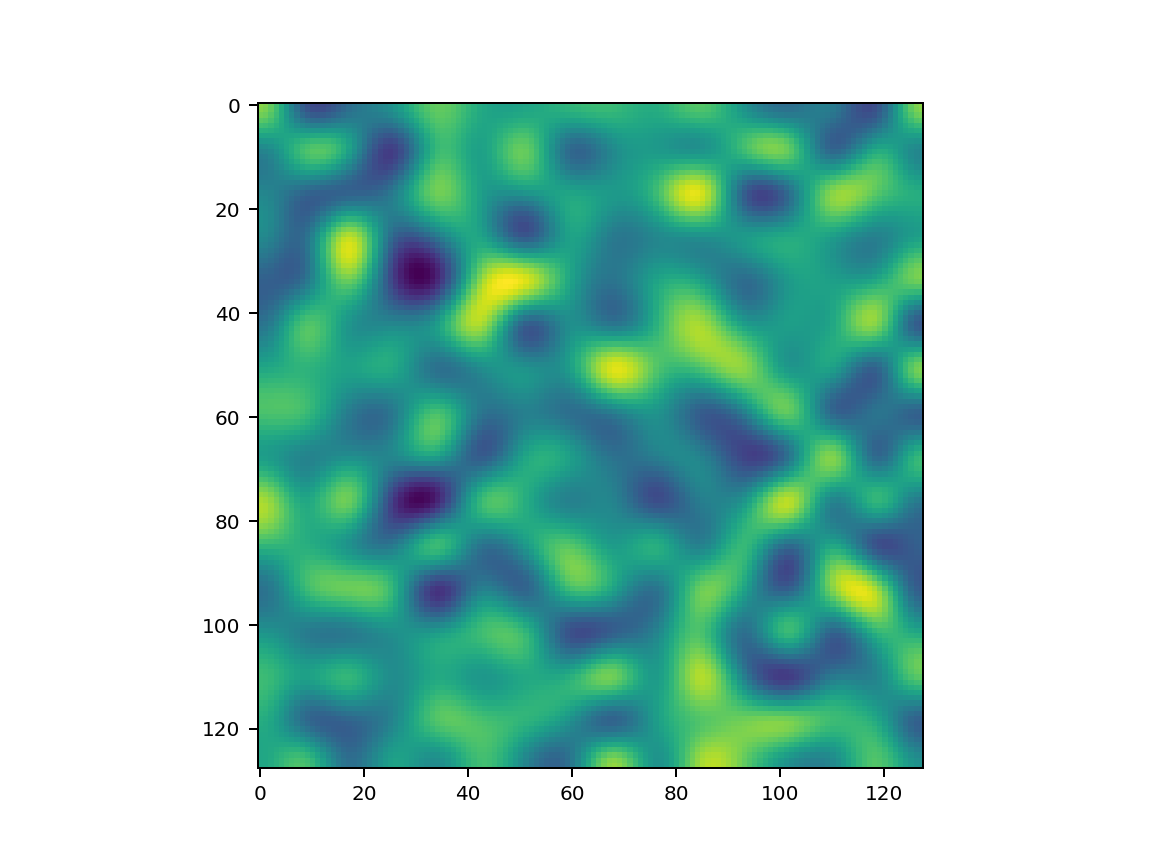

In [173]:
plt.figure()
plt.imshow(img[64])

In [332]:
n=21
im = np.ones((n,n,n))
im2 = fft.irfftn(fft.rfftn(im))
im.shape,im2.shape

((21, 21, 21), (21, 21, 20))

In [348]:
from numpy import fft
forw = fft.rfftn
back = fft.irfftn

kernel_pad = np.pad(kernel,[[0,img.shape[i]+1] for i in range(3)],mode='constant')
kernel_pad = forw(kernel_pad)

# img_ft = np.zeros([img.shape[i]+kernel.shape[i] for i in range(3)]).astype(np.float32)
shape = img.shape
def manual(img,kernel):
    kshape = kernel.shape
    img_ft = np.pad(img,[[0,kernel.shape[i]+1] for i in range(3)],mode='reflect')
    out_shape = img_ft.shape
#     img_ft[kshape[0]//2:-kshape[0]//2,kshape[1]//2:-kshape[1]//2,kshape[2]//2:-kshape[2]//2] = img

    img_ft = forw(img_ft)
    img_ft = kernel_pad*img_ft
#     res = np.zeros()
    img_ft = back(img_ft)#,s=out_shape)
    
#     img_ft = img_ft[kshape[0]//2:-kshape[0]//2,kshape[1]//2:-kshape[1]//2,kshape[2]//2:-kshape[2]//2]
    img_ft = img_ft[kshape[0]//2:-kshape[0]//2-1,kshape[1]//2:-kshape[1]//2-1,kshape[2]//2:-kshape[2]//2-1]
#     img_ft = img_ft[kshape[0]//2:,kshape[1]//2:,kshape[2]//2:]
    img_ft[img_ft<0] = 0
    return img_ft

def ss(img,kernel):
    return signal.fftconvolve(img,kernel,mode='same')

resm = manual(img,kernel)
ress = ss(img,kernel)
# resm.shape
%timeit manual(img,kernel)
%timeit signal.fftconvolve(img,kernel,mode='same')

493 ms ± 10.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.01 s ± 22 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<IPython.core.display.Javascript object>


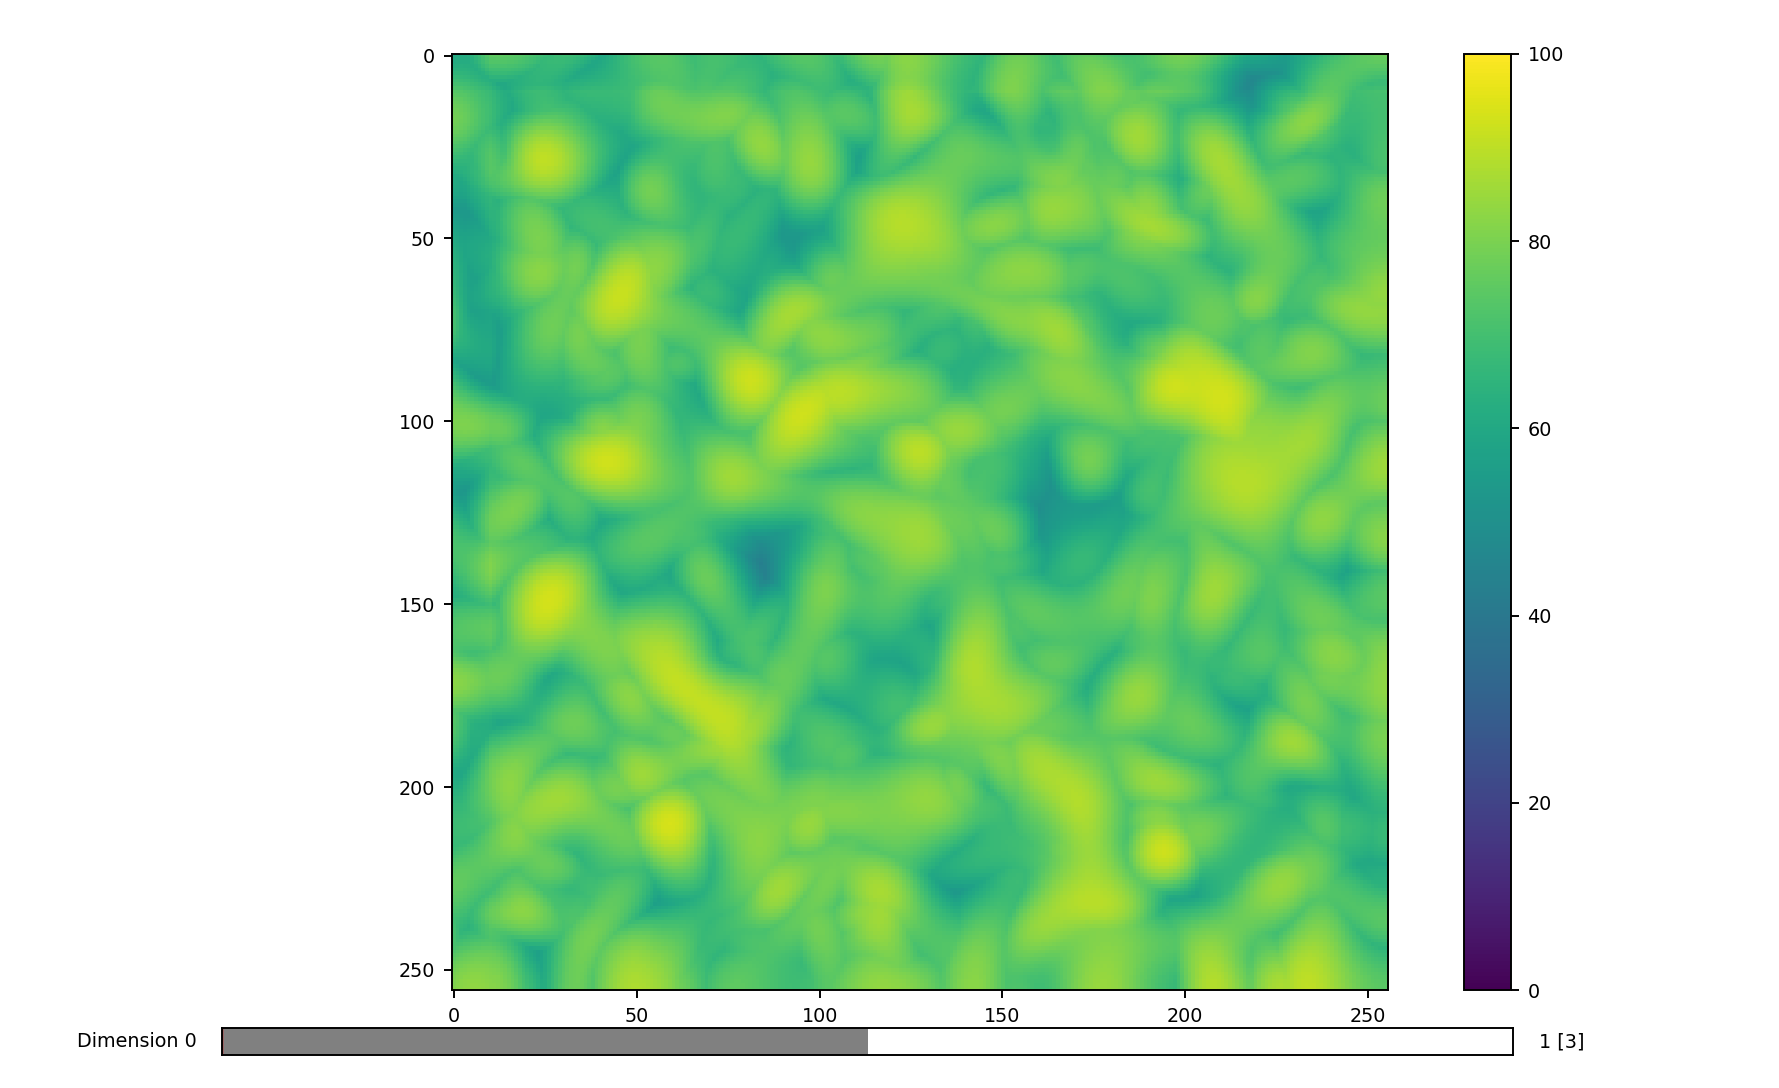

(<Figure size 988.8x604.8 with 3 Axes>,
 <matplotlib.image.AxesImage at 0x1c3e360da0>)

In [349]:
tifffile.imshow(np.array([img,resm,ress]).max(-3),vmin=0,vmax=100,photometric='zeroisblack')
